<a href="https://colab.research.google.com/github/Tanaya06/Task_2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TANAYA PESHAVE**
##**GRIP - The Sparks Foundation**

### **TASK 2 - Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [ ]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Analyse the dataset

In [ ]:
# To know number of rows and collumns
iris_df.shape

(150, 4)

In [ ]:
# To find if any null value is present
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# To see summary statistics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Find outliers using boxplot

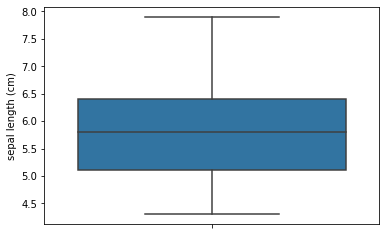

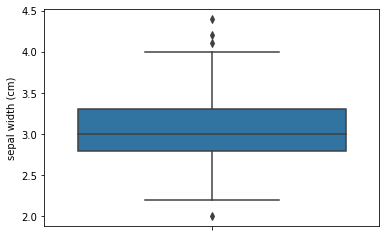

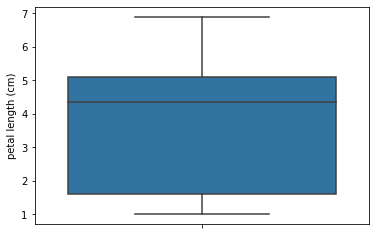

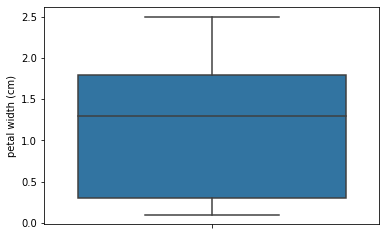

In [ ]:
# To find outliers
cols = iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()



*   From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'



Remove outliers and analyse the boxplot for sepal width

In [ ]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
iris_df = iris_df[(iris_df['sepal width (cm)'] >= q1-1.5*iqr) & (iris_df['sepal width (cm)'] <= q3+1.5*iqr)]

# To find out the number of rows and column after outlier treatment
iris_df.shape

(146, 4)

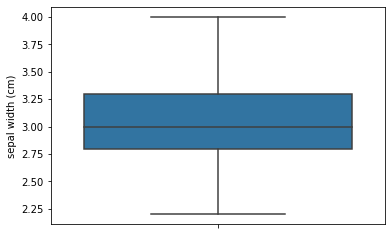

In [ ]:
# Bloxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=iris_df['sepal width (cm)'])
plt.show()

**Find optimum number of clusters**

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [ ]:
cluster_range = range(1,11)
clusters_df = pd.DataFrame({'cluster_number': cluster_range, 'WCSS': wcss})
clusters_df[0:20]

,cluster_number,WCSS
0,1,655.601233
1,2,143.891875
2,3,73.478692
3,4,53.267005
4,5,42.611211
5,6,36.597858
6,7,31.831534
7,8,28.307284
8,9,26.506804
9,10,24.682667


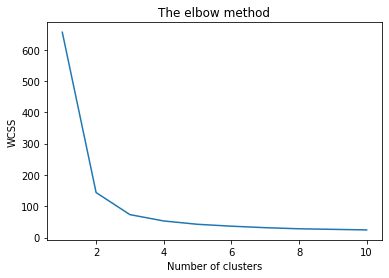

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph (Elbow method), the optimum clusters is where the elbow occurs i.e the WCSS doesn't decrease significantly with every iteration.

Here elbow occurs at **3**

From this we choose the number of clusters as **3**.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(x)

Visualise the clusters

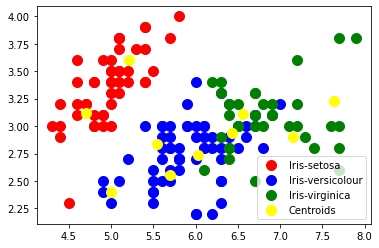

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Conclusion** - 'The Elbow method' finds the optimum number of clusters which are then visualised using scatter plot